In [61]:
# Using Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv("titanic.csv")

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [10]:
mean_Fare= df['Fare'].mean()
median_Fare =df['Fare'].median()

In [11]:
mean_Fare

35.627188489208635

In [12]:
median_Fare

14.4542

In [33]:
d_mean=df['Fare'].fillna(mean_Fare)              # to fill with arbitary value use fillna(99) to fill 99 in missing values
d_mean

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

<Axes: >

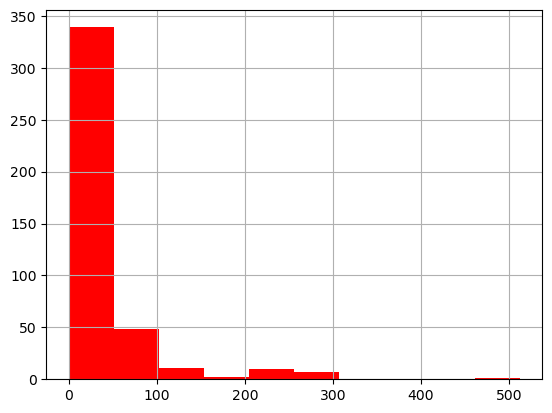

In [30]:
ax=plt.figure().add_subplot 
df['Fare'].hist(ax=ax,color='Green')
d_mean.hist(ax=ax,color='red')

# Using sklearn

In [56]:
from sklearn.model_selection import train_test_split       
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [57]:
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [58]:
imputer1= SimpleImputer(strategy='median')     #strategy = 'constant',fill_value=99
imputer2= SimpleImputer(strategy='mean')

In [59]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
    ],remainder = 'passthrough')

In [63]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [64]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [65]:
x_train

array([[23.0, 8.6625, 1172, ..., '315085', nan, 'S'],
       [2.0, 20.2125, 1176, ..., '370129', nan, 'S'],
       [39.0, 13.4167, 932, ..., '349256', nan, 'C'],
       ...,
       [29.0, 7.925, 964, ..., '3101297', nan, 'S'],
       [24.0, 27.7208, 907, ..., 'SC/PARIS 2167', nan, 'C'],
       [27.0, 27.7208, 1060, ..., '17770', nan, 'C']], dtype=object)

In [66]:
x_test

array([[27.0, 51.8625, 1038, 1, 'Hilliard, Mr. Herbert Henry', 'male', 0,
        0, '17463', 'E46', 'S'],
       [21.0, 7.7958, 1115, 3, 'Karlsson, Mr. Einar Gervasius', 'male',
        0, 0, '350053', nan, 'S'],
       [61.0, 12.35, 1085, 2, 'Lingane, Mr. John', 'male', 0, 0,
        '235509', nan, 'Q'],
       [64.0, 26.55, 1197, 1,
        'Crosby, Mrs. Edward Gifford (Catherine Elizabeth Halstead)',
        'female', 1, 1, '112901', 'B26', 'S'],
       [27.0, 69.55, 1080, 3, 'Sage, Miss. Ada', 'female', 8, 2,
        'CA. 2343', nan, 'S'],
       [61.0, 262.375, 1034, 1, 'Ryerson, Mr. Arthur Larned', 'male', 1,
        3, 'PC 17608', 'B57 B59 B63 B66', 'C'],
       [33.0, 20.575, 924, 3, 'Dean, Mrs. Bertram (Eva Georgetta Light)',
        'female', 1, 2, 'C.A. 2315', nan, 'S'],
       [27.0, 8.05, 1308, 3, 'Ware, Mr. Frederick', 'male', 0, 0,
        '359309', nan, 'S'],
       [55.0, 59.4, 912, 1, 'Rothschild, Mr. Martin', 'male', 1, 0,
        'PC 17603', nan, 'C'],
       [29.0